In [281]:
import numpy as np
from matplotlib import pyplot as plt
import functools

In [282]:
def non_linear(x):
    y = x**3
    return y

def inverse_non_linear(y):
    x = np.sign(y)*np.exp(1/3*np.log(np.abs(y)))
    return x
    

In [302]:
def normalization(x, min, max):
    y = (x - min)*2/(max-min)-1
    return y

def forward_layer(x,a,b):
    x = x*a+b
    x = non_linear(x)
    return x


def normalized_forward_layer(x,a,b,c,d):
    x = forward_layer(x,a,b)
    x = x*c+d
    return x



def forward_function(x,a,b,c,d,n_layers):
    for i in range(n_layers):   
        x = normalized_forward_layer(x,a[i],b[i],c[i],d[i])
    return x



def backward_function(y,a,b,c,d,n_layers):
    for i in range(n_layers):
        y = (y-d[n_layers-i-1])/c[n_layers-i-1]
        y = inverse_non_linear(y)
        y = (y-b[n_layers-i-1])/a[n_layers-i-1]
    return y


# def normalization(f,x):
#     max = f(1)
#     min = f(0)
#     y = (f(x) - min)/(max-min)
#     return y

In [322]:
n_layers = 20

# a = np.random.rand(n_layers)*2
a = np.ones(n_layers)
b = np.random.rand(n_layers)*2-1
max = forward_layer(1,a,b)
min = forward_layer(-1,a,b)
c = 2/(max-min)
d = -min*c-1



In [323]:
forward = functools.partial(forward_function,a=a,b=b,c=c,d=d,n_layers=n_layers)
backward = functools.partial(backward_function,a=a,b=b,c=c,d=d,n_layers=n_layers)


In [327]:
x = np.linspace(-1,1,1000+1)
y = forward(x)

gradient = np.gradient(y, x)
x_reverse = backward(y)
err = np.max(np.abs(x-x_reverse))
print(err)

nan


/tmp/ipykernel_220774/448540540.py:6: RuntimeWarning: invalid value encountered in power
  x = np.power(y,1/3)


/tmp/ipykernel_220774/999524737.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


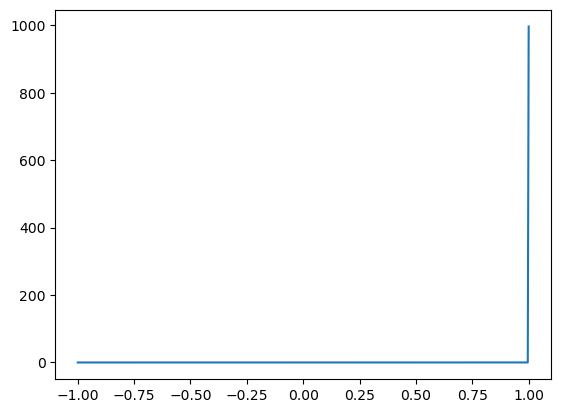

In [325]:
fig,ax = plt.subplots()
ax.plot(x,gradient)
fig.show()